In [55]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer



In [31]:
#load the dataset

df =pd.read_csv(r"C:\Users\lenovo\OneDrive\Desktop\Fake Product Review Monitoring System\fake reviews dataset.csv")
df

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...
...,...,...,...,...
40427,Clothing_Shoes_and_Jewelry_5,4.0,OR,I had read some reviews saying that this bra r...
40428,Clothing_Shoes_and_Jewelry_5,5.0,CG,I wasn't sure exactly what it would be. It is ...
40429,Clothing_Shoes_and_Jewelry_5,2.0,OR,"You can wear the hood by itself, wear it with ..."
40430,Clothing_Shoes_and_Jewelry_5,1.0,CG,I liked nothing about this dress. The only rea...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [4]:
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [5]:
df.describe()

,rating
count,40432.000000
mean,4.256579
std,1.144354
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [6]:
df.nunique()


category       10
rating          5
label           2
text_       40412
dtype: int64

In [7]:
df.value_counts()

category                      rating  label  text_                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
Kindle_Store_5                5.0     CG     I received this story as an ARC in exchange for an honest review. The first book in the series was the prequel, "A Moon Cracker," which was written by Holly Crane. I loved the characters, the story, and the plot. I enjoyed the story immensely. I was especially drawn to the heroine and her family.                                                                                                   

In [8]:
df.shape


(40432, 4)

In [9]:
df.columns

Index(['category', 'rating', 'label', 'text_'], dtype='object')

In [10]:
df.dtypes

category     object
rating      float64
label        object
text_        object
dtype: object

# cleaning the data

In [11]:
df.duplicated().sum

<bound method Series.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
40427    False
40428    False
40429    False
40430    False
40431    False
Length: 40432, dtype: bool>

In [12]:
df.isnull().sum()

category    0
rating      0
label       0
text_       0
dtype: int64

In [24]:
def clean_text(text):
    # Remove special characters and symbols, keep alphanumeric and spaces
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove extra whitespace
    text = ' '.join(text.split())
    
    return text

# Apply cleaning to the 'text_' column
df['text_'] = df['text_'].apply(clean_text)

# Display first few rows of cleaned data
print(df.head())

             category  rating  label  \
0  Home_and_Kitchen_5     5.0      1   
1  Home_and_Kitchen_5     5.0      1   
2  Home_and_Kitchen_5     5.0      1   
3  Home_and_Kitchen_5     1.0      1   
4  Home_and_Kitchen_5     5.0      1   

                                               text_  word_count  \
0  love this well made sturdy and very comfortabl...          12   
1  love it a great upgrade from the original ive ...          16   
2  this pillow saved my back i love the look and ...          14   
3  missing information on how to use it but it is...          17   
4  very nice set good quality we have had the set...          18   

   promotional_language  too_short  is_empty  gibberish  is_junk  
0                  True      False     False      False    False  
1                  True      False     False      False    False  
2                 False      False     False      False    False  
3                 False      False     False      False    False  
4              

In [25]:
# Count number of words in each cleaned review
df["word_count"] = df["text_"].apply(lambda x: len(x.split()))

# Filter shorter reviews (e.g., less than 10 words)
short_fake_reviews = df[df["word_count"] < 10]

# View some short fake-looking reviews
print(short_fake_reviews[["text_", "word_count"]].head())


                                                text_  word_count
5         i wanted different flavors but they are not           8
60  great cup will last forever keeps things cool ...           9
62  excellent quality product perfect for my ccozinha           7
72     purchased as a christmas gift she will love it           9
80                     a little pricey for what it is           7


In [15]:
# Define a set of common promotional/marketing words
promotional_words = {
    "amazing", "excellent", "perfect", "incredible", "must-buy", "highly recommend",
    "best ever", "life-changing", "awesome", "unbelievable", "fantastic", "outstanding",
    "love it", "top-notch", "superb", "five stars", "exceptional"
}

# Function to check if any promotional word is in the review
def contains_promotional_language(text):
    return any(word in text for word in promotional_words)

# Apply to your cleaned_text column
df["promotional_language"] = df["text_"].apply(contains_promotional_language)

# Show a few flagged rows
print(df[df["promotional_language"] == True][["text_"]].head())


                                                text_
0   love this well made sturdy and very comfortabl...
1   love it a great upgrade from the original ive ...
6   they are the perfect touch for me and the only...
15  absolutely adorable and excellent price we hav...
16  love this perfect size for an entire familyver...


In [32]:
#label encoding
df["label"] = df["label"].map({"CG": 1, "OR": 0})

print(df.head())
print(df["label"].value_counts())


             category  rating  label  \
0  Home_and_Kitchen_5     5.0      1   
1  Home_and_Kitchen_5     5.0      1   
2  Home_and_Kitchen_5     5.0      1   
3  Home_and_Kitchen_5     1.0      1   
4  Home_and_Kitchen_5     5.0      1   

                                               text_  
0  Love this!  Well made, sturdy, and very comfor...  
1  love it, a great upgrade from the original.  I...  
2  This pillow saved my back. I love the look and...  
3  Missing information on how to use it, but it i...  
4  Very nice set. Good quality. We have had the s...  
label
1    20216
0    20216
Name: count, dtype: int64


In [17]:
df

,category,rating,label,text_,word_count,promotional_language
0,Home_and_Kitchen_5,5.0,1,love this well made sturdy and very comfortabl...,12,True
1,Home_and_Kitchen_5,5.0,1,love it a great upgrade from the original ive ...,16,True
2,Home_and_Kitchen_5,5.0,1,this pillow saved my back i love the look and ...,14,False
3,Home_and_Kitchen_5,1.0,1,missing information on how to use it but it is...,17,False
4,Home_and_Kitchen_5,5.0,1,very nice set good quality we have had the set...,18,False
...,...,...,...,...,...,...
40427,Clothing_Shoes_and_Jewelry_5,4.0,0,i had read some reviews saying that this bra r...,329,False
40428,Clothing_Shoes_and_Jewelry_5,5.0,1,i wasnt sure exactly what it would be it is a ...,270,True
40429,Clothing_Shoes_and_Jewelry_5,2.0,0,you can wear the hood by itself wear it with t...,340,False
40430,Clothing_Shoes_and_Jewelry_5,1.0,1,i liked nothing about this dress the only reas...,278,True


In [26]:
df.columns

Index(['category', 'rating', 'label', 'text_', 'word_count',
       'promotional_language', 'too_short', 'is_empty', 'gibberish',
       'is_junk'],
      dtype='object')

In [19]:
#split the data for train test 
from sklearn.model_selection import train_test_split

X = df["text_"]
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
#vectorize the text 
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [46]:
df.columns

Index(['category', 'rating', 'label', 'text_'], dtype='object')

In [54]:
# Assuming df is your DataFrame
Q1 = df['rating'].quantile(0.25)
Q3 = df['rating'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = df[(df['rating'] < lower_bound) | (df['rating'] > upper_bound)]

print("Number of outliers in word_count:", outliers.shape[0])
print(outliers[['rating', 'text_']].head())

# Filter out the outliers
df_cleaned = df[(df['rating'] >= lower_bound) & (df['rating'] <= upper_bound)]
print("Shape after removing outliers:", df_cleaned.shape)

Number of outliers in word_count: 4122
    rating                                              text_
3      1.0  Missing information on how to use it, but it i...
13     1.0  These are so flimsy! They are not the quality ...
26     2.0  Not what I am accustomed to. The only reason I...
39     1.0  Awful experience, everything stuck, cooked eve...
41     2.0  SHEET COLOR IS NICE BUY FOR MY SIZE FOR MY TOW...
Shape after removing outliers: (36310, 4)


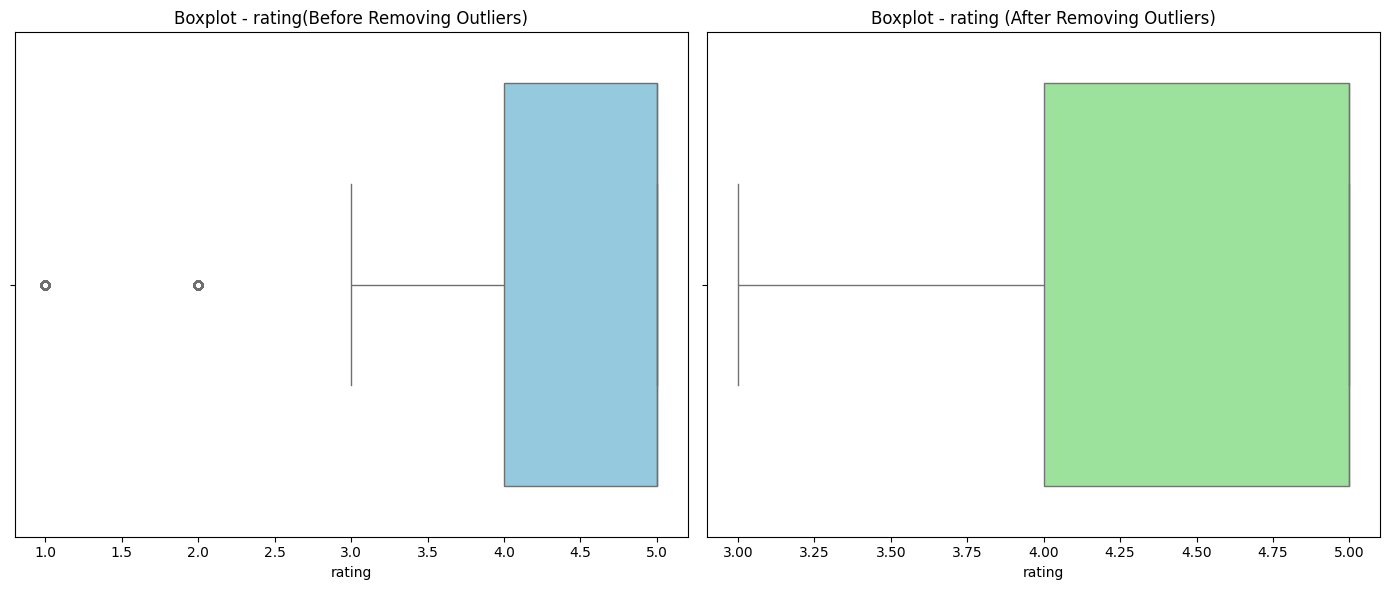

In [57]:
# Original rating (before outlier removal)
plt.figure(figsize=(14, 6))

# Boxplot before
plt.subplot(1, 2, 1)
sns.boxplot(x=df['rating'], color='skyblue')
plt.title("Boxplot - rating(Before Removing Outliers)")

# Boxplot after
plt.subplot(1, 2, 2)
sns.boxplot(x=df_cleaned['rating'], color='lightgreen')
plt.title("Boxplot - rating (After Removing Outliers)")

plt.tight_layout()
plt.show()
